<a href="https://colab.research.google.com/github/Rizzyad/LKS_AI_PBG/blob/main/LKS_AI_PBG_Tim_1__B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul A: Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#impor library dan modul yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#membaca file dataset yang akan digunakan dan ditampung kepada variabel df
df = pd.read_csv('/content/datasets.csv.xls', sep=',')

#menampilkan 5 baris teratas dataframe
df.head()

,,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [ ]:
#menampilkan informasi yang ada dalam dataframe seperti kolom, null value(data yang kosong), dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0                      3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [ ]:
#menampilkan dimensi dataframe seperti jumlah baris dan jumlah kolom
df.shape

(3107, 9)

# **Modul B: Data Preprocessing**

In [ ]:
#memeriksa apakah ada null value dalam dataframe
df.isnull().sum()

                     0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [ ]:
#memeriksa apakah ada duplicated value(nilai yang terduplikat) dalam dataframe
df.duplicated().sum()

0

In [ ]:
#menghapus baris yang terdapat null value dalam dataframe
df = df.dropna(axis=0)

#mengecek kembali apakah masih ada null value dalam dataframe
df.isnull().sum()

                     0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

In [ ]:
#menampilkan kembali jumlah baris dan kolom dalam dataframe yang sudah dihapus null valuenya
df.shape

(3096, 9)

In [ ]:
#menampilkan keunikan kelas dalam kolom target yaitu 'effectiveness'
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom ' '
df[' '].nunique()

3096

>kolom diatas tidak ada nama kolom nya, namun dilihat dari jumlah nilai unik nya sama dengan jumlah baris dalam dataframe, jadi seperti nya kolom tanpa nama ini adalah id, maka bisa di ubah nama nya menjadi id

In [ ]:
df = df.rename(columns = {' ':'id'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3096 non-null   int64 
 1   urlDrugName        3096 non-null   object
 2   rating             3096 non-null   int64 
 3   effectiveness      3096 non-null   object
 4   sideEffects        3096 non-null   object
 5   condition          3096 non-null   object
 6   benefitsReview     3096 non-null   object
 7   sideEffectsReview  3096 non-null   object
 8   commentsReview     3096 non-null   object
dtypes: int64(2), object(7)
memory usage: 241.9+ KB


In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'commentsReview'
df['commentsReview'].nunique()

3044

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'sideEffectsReview'
df['sideEffectsReview'].nunique()

2806

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'benefitsReview'
df['benefitsReview'].nunique()

3021

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'condition'
df['condition'].nunique()

1422

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'sideEffects'
df['sideEffects'].nunique()

5

In [ ]:
#menampilkan jumlah nilai yang unik dalam kolom 'urlDrugName'
df['urlDrugName'].nunique()

501

In [ ]:
#menampilkan tipe data setiap kolom dalam dataframe
df.dtypes

id                    int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object

In [ ]:
#menyalin variabel df ke variabel
df_num = df.copy()

In [ ]:
#mengimpor LabelEncoder dari library sklearn.preprocessing untuk mengubah tipe data yang kategorik dalam dataframe ke tipe data numerik
from sklearn.preprocessing import LabelEncoder

#membuat objek le sebagai instansi dari LabelEncoder
le = LabelEncoder()

#mengubah kolom-kolom bertipe kategorik menjadi numerik
df_num['urlDrugName'] = le.fit_transform(df_num['urlDrugName'])
df_num['effectiveness'] = le.fit_transform(df_num['effectiveness'])
df_num['sideEffects'] = le.fit_transform(df_num['sideEffects'])
df_num['condition'] = le.fit_transform(df_num['condition'])
df_num['benefitsReview'] = le.fit_transform(df_num['benefitsReview'])
df_num['sideEffectsReview'] = le.fit_transform(df_num['sideEffectsReview'])
df_num['commentsReview'] = le.fit_transform(df_num['commentsReview'])

#menampilkan kembali tipe data yang sudah diubah dalam dataframe
df_num.dtypes

id                   int64
urlDrugName          int64
rating               int64
effectiveness        int64
sideEffects          int64
condition            int64
benefitsReview       int64
sideEffectsReview    int64
commentsReview       int64
dtype: object

In [ ]:
#mengubah nama target agar target berada dalam kolom paling akhir dataframe
df_num['Effectiveness'] = df_num['effectiveness'].rename()

In [ ]:
#mengecek apakah sudah ada kolom yang baru dalam dataframe
df_num.columns

Index(['id', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'Effectiveness'],
      dtype='object')

In [ ]:
#menghapus kolom target yang lama karena sudah ada kolom target yang baru
df_num = df_num.drop('effectiveness', axis=1)

#mengecek kembali apakah kolom sudah terhapus
df_num.columns

Index(['id', 'urlDrugName', 'rating', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'Effectiveness'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1327
0     925
4     413
2     245
3     186
Name: Effectiveness, dtype: int64

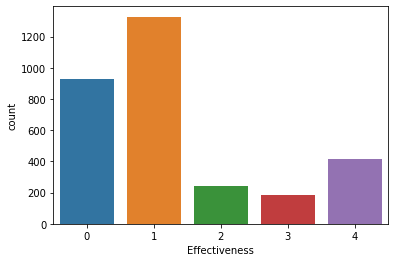

In [ ]:
#menampilkan distribusi data dalam setiap kelas pada kolom target untuk mengetahui seberapa seimbang data yang terdistribusi
sns.countplot(df_num['Effectiveness'])

#menghitung jumlah nilai pada setiap kelas dalam dataframe
df_num['Effectiveness'].value_counts()

>Pada visualisasi data diatas dapat dilihat bahwa distribusi data sangat tidak seimbang dan akan menyebabkan model bagus memprediksi kelas 1 namun buruk dalam memprediksi kelas lain, maka perlu augmentasi data agar distribusi datanya seimbang

In [ ]:
#mengimpor resample dari library sklearn.utils
from sklearn.utils import resample

#membuat objek untuk membagi kelas kedalam beberapa objek yang dibagi berdasarkan data terbanyak yaitu kelas 1 pada kolom 'effectiveness' menjadi df_majority(minoritas) dan selebihnya minoritas
df_majority = df_num[(df_num['Effectiveness']==1)]
df_minority = df_num[(df_num['Effectiveness']==2)]
df_minority2 = df_num[(df_num['Effectiveness']==3)]
df_minority3 = df_num[(df_num['Effectiveness']==4)]
df_minority4 = df_num[(df_num['Effectiveness']==0)]

#melakukan upsample pada setiap kelas minoritas menurut jumlah data kelas mayoritas
df_minority_upsampled = resample(df_minority, replace=True, n_samples=1327, random_state=0)
df_minority_upsampled2 = resample(df_minority2, replace=True, n_samples=1327, random_state=0)
df_minority_upsampled3 = resample(df_minority3, replace=True, n_samples=1327, random_state=0)
df_minority_upsampled4 = resample(df_minority4, replace=True, n_samples=1327, random_state=0)

#melakukan penggabungan semua kelas yang sudah di upsample menjadi satu kembali
df_upsampled = pd.concat([df_majority,df_minority_upsampled4,df_minority_upsampled,df_minority_upsampled2,df_minority_upsampled3])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1327
0    1327
2    1327
3    1327
4    1327
Name: Effectiveness, dtype: int64

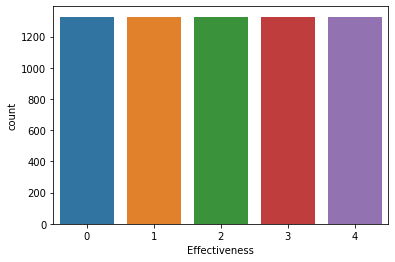

In [ ]:
#menampilkan distribusi kembali untuk mengecek apakah distribusi data sudah seimbang
sns.countplot(df_upsampled['Effectiveness'])

#menampilkan jumlah isi data tiap kelas kembali untuk mengecek apakah jumlah isi data nya sudah seimbang
df_upsampled['Effectiveness'].value_counts()

Dari visualisasi diatas dapat dilihat bahwa kini distribusi data sudah seimbang

# **Modul C: Data Visualisation**

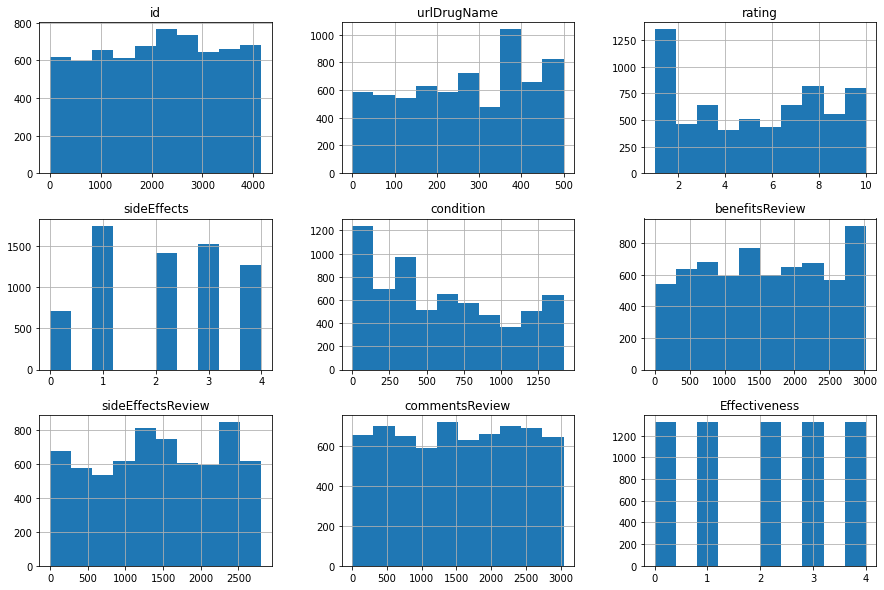

In [ ]:
#menampilkan histogram distribusi isi data tiap kolom dalam dataframe
ax = df_upsampled.hist(figsize=(15,10))

>Dari visualisasi diatas dapat dilihat dalam kolom urlDrugName data paling banyak berada di angka 400an, lalu di kolom rating data terbanyak ada di angka 2, pada kolom sideEffect didominasi oleh nomor 1 yaitu Mild Side Effects, untuk fitur target data sudah terdistribusi dengan merata karena sudah dilakukan upsampling

<AxesSubplot:>

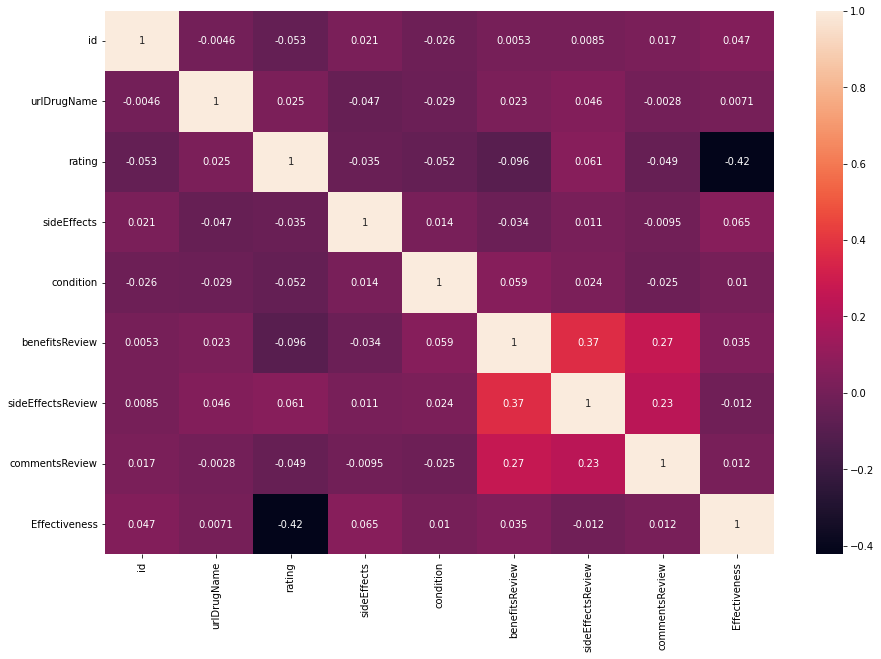

In [ ]:
#membuat dan mengatur ukuran figur untuk menampilkan heatmap yang akan dibuat nantinya
plt.figure(figsize=(15,10))

#menampilkan heatmap korelasi antar fitur/kolom dalam dataframe
sns.heatmap(df_upsampled.corr(), annot=True)

>Dari visualisasi heatmap diatas terlihat bahwa fitur dengan korelasi tertinggi kepada target adalah sideEffects

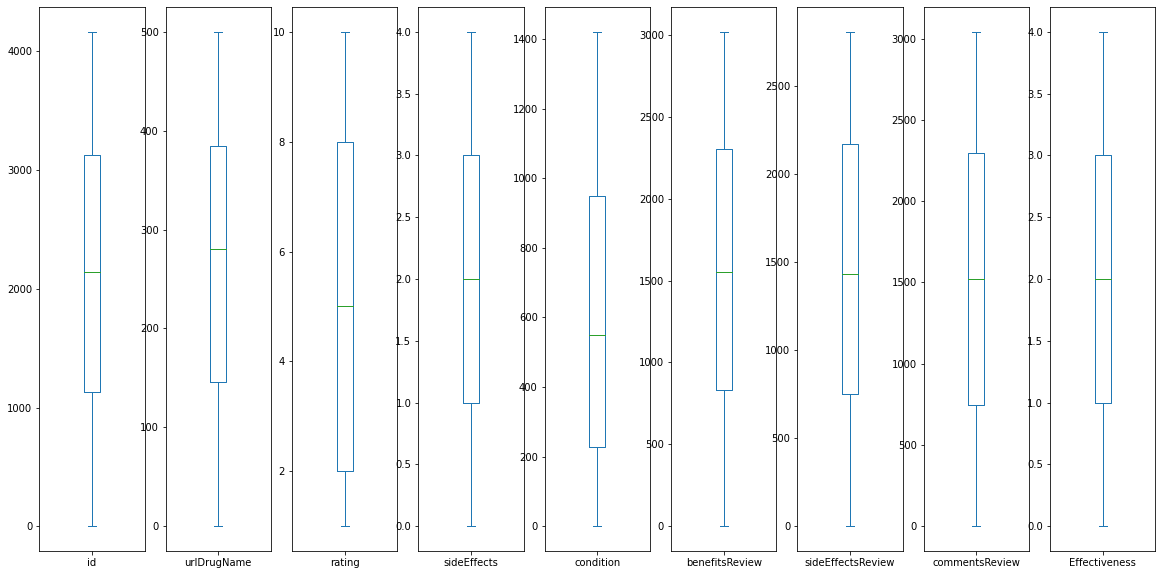

In [ ]:
#menampilkan persebaran data untuk mendeteksi apakah ada nilai outlier dalam dataframe
ax = df_upsampled.plot(kind='box',subplots=True,figsize=(20,10))

>Pada visualisasi diatas dapat dilihat bahwa tidak ada nilai outlier dalam dataframe

# **Modul D2: Classification**

In [ ]:
#melakukan pemisahan data/splitting menjadi 2 objek yaitu y untuk fitur target dan X untuk kolom selebihnya
X = df_upsampled.drop('Effectiveness', axis=1)
y = df_upsampled['Effectiveness']

In [ ]:
#mengimpor library dan modul yang akan digunakan dalam pemodelan
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

#melakukan splitting data untuk training model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#melakukan pemodelan menggunakan beberapa algoritma machine learning dan dicari algoritma dengan akurasi terbesar
cls = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    SVC(probability=True),
    XGBClassifier(),
]

acc_dict = {}

log_cols = ['Classifier','Accuracy']
log = pd.DataFrame(columns=log_cols)

for clf in cls:
  name = clf.__class__.__name__
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  acc = accuracy_score(y_test,y_pred)
  acc_dict[name] = acc

for clf in acc_dict:
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Accuracy', ylabel='Classifier'>

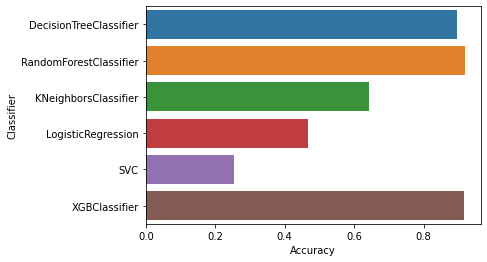

In [ ]:
#melakukan visualisasi akurasi tiap tiap algoritma yang sudah di training
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

sns.barplot(data=log, x='Accuracy', y='Classifier')

In [ ]:
#menampilkan dataframe dan mengurutkan nya dari akurasi terbesar
log.sort_values(by=['Accuracy'], ascending=False)

,Classifier,Accuracy
0,RandomForestClassifier,0.918613
0,XGBClassifier,0.915599
0,DecisionTreeClassifier,0.896760
0,KNeighborsClassifier,0.643557
0,LogisticRegression,0.467973
0,SVC,0.254710


>Dapat dilihat dalam dataframe diatas bahwa algoritma random forest memiliki akurasi yang cukup tinggi

In [ ]:
#melakukan training random forest sendiri karena memiliki akurasi tertinggi
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_train)
y_pred = rf.predict(X_test)

#menampilkan akurasi training model untuk dibandingkan dengan akurasi testing guna mencegah terjadi nya overfitting/underfitting
print('Akurasi pada training model :', accuracy_score(y_train,y_pred2))

#menampilkan akurasi testing model untuk dibandingkan dengan akurasi training  guna mencegah terjadi nya overfitting/underfitting
print('Akurasi pada testing model :', accuracy_score(y_test,y_pred))

#menampilkan confusion matrix untuk mengetahui seberapa akurat akurasi model yang sudah dibuat
print(confusion_matrix(y_test,y_pred))

#menampilkan laporan klasifikasi untuk mengetahui skor-skor lain seperti precision,recall,f1-score
print(classification_report(y_test,y_pred))

Akurasi pada training model : 1.0
Akurasi pada testing model : 0.9193669932177845
[[240  18   4   2   6]
 [ 49 185   5   1  11]
 [  0   0 269   0   3]
 [  0   0   2 283   0]
 [  2   1   0   3 243]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       270
           1       0.91      0.74      0.81       251
           2       0.96      0.99      0.97       272
           3       0.98      0.99      0.99       285
           4       0.92      0.98      0.95       249

    accuracy                           0.92      1327
   macro avg       0.92      0.92      0.92      1327
weighted avg       0.92      0.92      0.92      1327



In [ ]:
#melakukan training xgboost sendiri karena memiliki akurasi tertinggi ke 2
xgb = XGBClassifier()

xgb.fit(X_train,y_train)
y_pred2 = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

#menampilkan akurasi training model untuk dibandingkan dengan akurasi testing guna mencegah terjadi nya overfitting/underfitting
print('Akurasi pada training model :', accuracy_score(y_train,y_pred2))

#menampilkan akurasi testing model untuk dibandingkan dengan akurasi training  guna mencegah terjadi nya overfitting/underfitting
print('Akurasi pada testing model :', accuracy_score(y_test,y_pred))

#menampilkan confusion matrix untuk mengetahui seberapa akurat akurasi model yang sudah dibuat
print(confusion_matrix(y_test,y_pred))

#menampilkan laporan klasifikasi untuk mengetahui skor-skor lain seperti precision,recall,f1-score
print(classification_report(y_test,y_pred))

Akurasi pada training model : 0.9998116051243406
Akurasi pada testing model : 0.9155990957045969
[[235  21   2   2  10]
 [ 52 186   2   2   9]
 [  0   0 269   0   3]
 [  0   2   0 283   0]
 [  4   3   0   0 242]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       270
           1       0.88      0.74      0.80       251
           2       0.99      0.99      0.99       272
           3       0.99      0.99      0.99       285
           4       0.92      0.97      0.94       249

    accuracy                           0.92      1327
   macro avg       0.91      0.91      0.91      1327
weighted avg       0.92      0.92      0.91      1327



In [ ]:
#membuat fungsi clf_model untuk menampilkan skor validasi silang
def clf_model(model):
  scores = cross_val_score(model,X,y, cv=10)

  print('Skor validasi silang :', scores)
  print('Skor rata-rata validasi silang :', scores.mean())

In [ ]:
#menampilkan skor validasi silang untuk algoritma randomforest
clf_model(RandomForestClassifier())

Skor validasi silang : [0.90210843 0.90662651 0.90361446 0.89457831 0.92319277 0.91101056
 0.91553544 0.91402715 0.90648567 0.92458522]
Skor rata-rata validasi silang : 0.910176452415999


In [ ]:
#menampilkan skor validasi silang untuk algoritma xgboost
clf_model(XGBClassifier())

Skor validasi silang : [0.90662651 0.9186747  0.91114458 0.89307229 0.9126506  0.90497738
 0.91553544 0.92609351 0.89894419 0.92609351]
Skor rata-rata validasi silang : 0.9113812716931073


>Dapat dilihat bahwa skor validasi silang kedua algoritma diatas cukup bagus, jadi dapat disimpulkan bahwa algoritma **random forest** dan **xgboost** adalah algoritma terbaik untuk dataset ini